# MAGNETIC FIELD CREATED BY QUADRUPOLES
## ---------------------------
### Version 1 - Date 21/05/22
### Author: Víctor Vegas Luque - victorvegas24@gmail.com


In [1]:
# Importo NUMPY: una biblioteca que me permite crear matrices y vectores

import numpy as np
from numpy import random
# Importo varias librerias que me pertmiten hacer cosas de matematicas y plots.
import math 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
from plotly.subplots import make_subplots
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [2]:
#We import scipy, which contains functions for complete elliptic integral of the first and second kind
import scipy
from scipy import special
#scipy.special.ellipk - First kind
#scipy.special.ellipe - Second kind
from scipy.spatial.transform import Rotation as R
from scipy import integrate

Field components:

\begin{equation}
B_x=\frac{Cxz}{2\alpha^2\beta\rho^2}\left[(a^2+r^2)E(k^2)-\alpha^2 K(k^2)\right] 
\end{equation}

\begin{equation}
B_y=\frac{Cyz}{2\alpha^2\beta\rho^2}\left[(a^2+r^2)E(k^2)-\alpha^2 K(k^2)\right] 
\end{equation}

\begin{equation}
B_z=\frac{C}{2\alpha^2\beta}\left[(a^2-r^2)E(k^2)+ \alpha^2 K(k^2)\right]
\end{equation}

\begin{equation}
\rho^2 \equiv x^2+y^2 \ \ ; \ \ r^2\equiv x^2+y^2+z^2 \ \ ; \ \ \alpha^2\equiv a^2+r^2-2a\rho
\end{equation}

\begin{equation}
\beta^2\equiv a^2+r^2+2a\rho \ \ ; \ \ k^2 \equiv 1-\alpha^2/\beta^2 \ \ ; \ \ \gamma^2\equiv x^2-y^2
\end{equation}

In [3]:

def rho_square(X,Y):
    rho_square=X*X+Y*Y
    return rho_square
def r_square(X,Y,Z):
    r_square=X*X+Y*Y+Z*Z
    return r_square

    
def alpha_square(radius,X,Y,Z):
    alpha_square=radius*radius+r_square(X,Y,Z)-2*radius*(np.sqrt(rho_square(X,Y)))
    return alpha_square
def beta_square(radius,X,Y,Z):
    beta_square=radius*radius+r_square(X,Y,Z)+2*radius*(np.sqrt(rho_square(X,Y)))
    return beta_square
def k_square(radius,X,Y,Z):
    k_square=1-(alpha_square(radius,X,Y,Z)/beta_square(radius,X,Y,Z))
    return k_square
def gamma_square(X,Y):
    gamma_square=X*X-Y*Y
    return gamma_square

In [4]:

def Bx_spire(I,radius,X,Y,Z):
    C=mu=4.0*I*10**(-7.0)
    Bx=C*X*Z*((radius*radius+r_square(X,Y,Z))*scipy.special.ellipe(k_square(radius,X,Y,Z))-(alpha_square(radius,X,Y,Z))*scipy.special.ellipk(k_square(radius,X,Y,Z)))/(2*(alpha_square(radius,X,Y,Z))*np.sqrt(beta_square(radius,X,Y,Z))*rho_square(X,Y))
    
    return Bx

def By_spire(I,radius,X,Y,Z):
    C=mu=4.0*I*10**(-7.0)
    By=C*Y*Z*((radius*radius+r_square(X,Y,Z))*scipy.special.ellipe(k_square(radius,X,Y,Z))-(alpha_square(radius,X,Y,Z))*scipy.special.ellipk(k_square(radius,X,Y,Z)))/(2*(alpha_square(radius,X,Y,Z))*np.sqrt(beta_square(radius,X,Y,Z))*rho_square(X,Y))
    
    return By

def Bz_spire(I,radius,X,Y,Z):
    C=mu=4.0*I*10**(-7.0)
    Bz=C*((radius*radius-r_square(X,Y,Z))*scipy.special.ellipe(k_square(radius,X,Y,Z))+(alpha_square(radius,X,Y,Z))*scipy.special.ellipk(k_square(radius,X,Y,Z)))/(2*(alpha_square(radius,X,Y,Z))*np.sqrt(beta_square(radius,X,Y,Z)))
    return Bz

# SPIRE AT (0,0,0)

In [5]:
%%time
steps=50


Xmesh,Zmesh = np.meshgrid(np.linspace(-1.0,1,steps), np.linspace(-1.0,1,steps))
Ymesh=np.zeros_like(Xmesh)

Wall time: 0 ns


In [6]:
%%time
a=0.3
I=1


Bx=Bx_spire(I,a,Xmesh,Ymesh,Zmesh)
By=By_spire(I,a,Xmesh,Ymesh,Zmesh)
Bz=Bz_spire(I,a,Xmesh,Ymesh,Zmesh)



Wall time: 0 ns


In [ ]:
%%time
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(12)

M = np.hypot(Bx, Bz)

plt.quiver(Xmesh,Zmesh,Bx/M,Bz/M,M, scale=4, scale_units='inches',headwidth=3,headlength=4,pivot='middle',cmap='viridis')
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.colorbar()
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('X (a.u)',fontsize=30)
plt.ylabel('Z (a.u)',fontsize=30)
plt.tick_params(axis='both', which='major', pad=15)
plt.grid()
plt.savefig('IMAGES/Figure_BEllip.png', format='png')



plt.show() 

In [ ]:
'''
Ymesh,Zmesh = np.meshgrid(np.linspace(-1.0,1,steps), np.linspace(-1.0,1,steps))
Xmesh=np.array([np.array([0]*steps)]*steps)
'''

In [ ]:
'''
By=By_spire(I,a,Xmesh,Ymesh,Zmesh)
Bz=Bz_spire(I,a,Xmesh,Ymesh,Zmesh)
'''

In [ ]:
'''
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(10)

M = np.hypot(By, Bz)

plt.quiver(Ymesh,Zmesh,By/M,Bz/M,M, scale=4, scale_units='inches',headwidth=3,headlength=4,pivot='middle')
plt.xticks(fontsize=20)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('Y',fontsize=20)
plt.ylabel('Z',fontsize=20)
plt.yticks(fontsize=20)

plt.grid()

plt.show() 
'''

In [ ]:
%%time
BxBiot=np.zeros_like(Xmesh)
ByBiot=np.zeros_like(Xmesh)
BzBiot=np.zeros_like(Xmesh)

In [ ]:
%%time
a=0.3
I=1
C=I*10**(-7.0)
for i in range(0,len(Xmesh)):
    for j in range(0,len(Xmesh[0])):
        CROSS = lambda phi: np.cross([-a*np.sin(phi),a*np.cos(phi),0],[Xmesh[i][j]-a*np.cos(phi),Ymesh[i][j]-a*np.sin(phi),Zmesh[i][j]])
        R=lambda phi: np.linalg.norm([Xmesh[i][j]-a*np.cos(phi),Ymesh[i][j]-a*np.sin(phi),Zmesh[i][j]])
        BxBiot[i][j] =C*integrate.quad(lambda phi: CROSS(phi)[0]/(R(phi)**3), 0, 2*math.pi)[0]
        ByBiot[i][j] =C*integrate.quad(lambda phi: CROSS(phi)[1]/(R(phi)**3), 0, 2*math.pi)[0]
        BzBiot[i][j] =C*integrate.quad(lambda phi: CROSS(phi)[2]/(R(phi)**3), 0, 2*math.pi)[0]
        
        

In [ ]:
%%time
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(12)

M = np.hypot(BxBiot, BzBiot)

plt.quiver(Xmesh,Zmesh,BxBiot/M,BzBiot/M,M, scale=4, scale_units='inches',headwidth=3,headlength=4,pivot='middle',cmap='viridis')
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.colorbar()
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('X (a.u.)',fontsize=30)
plt.ylabel('Z (a.u.)',fontsize=30)
plt.tick_params(axis='both', which='major', pad=15)
plt.grid()
plt.savefig('IMAGES/Figure_BBiot.png', format='png')

plt.show() 

In [ ]:
BxDiff=Bx-BxBiot
ByDiff=By-ByBiot
BzDiff=Bz-BzBiot
Bmod=np.zeros_like(Bx)
BBiotmod=np.zeros_like(BxBiot)
for i in range(0,len(Bx)):
    for j in range(0,len(Bx[0])):
        Bmod[i][j]=np.linalg.norm([Bx[i][j],By[i][j],Bz[i][j]])
        BBiotmod[i][j]=np.linalg.norm([BxBiot[i][j],ByBiot[i][j],BzBiot[i][j]])
BDiff=(BBiotmod-Bmod)/Bmod



In [ ]:


fig, ax = plt.subplots()

fig.set_figwidth(17)
fig.set_figheight(10)

plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('X (a.u)',fontsize=30)
plt.ylabel('Z (a.u)',fontsize=30)
plt.tick_params(axis='both', which='major', pad=15)

c = ax.pcolormesh(Xmesh, Zmesh, BDiff, cmap='viridis')
ax.set_title('',fontsize=25)
# set the limits of the plot to the limits of the data
ax.axis([Xmesh.min(), Xmesh.max(), Zmesh.min(), Zmesh.max()])
fig.colorbar(c, ax=ax)
plt.savefig('IMAGES/Figure_BDiff.png', format='png')
plt.show()

In [ ]:
print(BDiff.max())

# Spire Located at (0.5,0.5,0.5)


In [7]:
Xmesh,Zmesh = np.meshgrid(np.linspace(-1.0,1,steps), np.linspace(-1.0,1,steps))
Ymesh=np.array([np.array([0]*steps)]*steps)

OFFSET=0.5
X_OFFSET=np.array([np.array([OFFSET]*steps)]*steps)
Y_OFFSET=np.array([np.array([OFFSET]*steps)]*steps)
Z_OFFSET=np.array([np.array([OFFSET]*steps)]*steps)

Xmesh_OFFSET=Xmesh-X_OFFSET
Ymesh_OFFSET=Ymesh-Y_OFFSET
Zmesh_OFFSET=Zmesh-Z_OFFSET

In [8]:
Bx_OFFSET=Bx_spire(I,a,Xmesh_OFFSET,Ymesh_OFFSET,Zmesh_OFFSET)
Bz_OFFSET=Bz_spire(I,a,Xmesh_OFFSET,Ymesh_OFFSET,Zmesh_OFFSET)

In [9]:
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(10)

M = np.hypot(Bx_OFFSET, Bz_OFFSET)

plt.quiver(Xmesh,Zmesh,Bx_OFFSET/M,Bz_OFFSET/M,M, scale=4, scale_units='inches',headwidth=3,headlength=4,pivot='middle')
plt.xticks(fontsize=20)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('X',fontsize=20)
plt.ylabel('Z',fontsize=20)
plt.yticks(fontsize=20)

plt.grid()

plt.show() 

# Spire located at (0.5,0,0.5), rotated 45º around Z, then 45º around X

In [10]:
phi_ang=np.array(list(range(0,361)))
phi_rad=phi_ang*2*math.pi/360
theta=math.pi/2
a=0.3
X=a*np.cos(phi_rad)*math.sin(theta)
Y=a*np.sin(phi_rad)*math.sin(theta)
Z=[0]*len(phi_rad)
SPI=[X,Y,Z]
#We create the grid of points
Xmesh,Zmesh = np.meshgrid(np.linspace(-1.0,1,steps), np.linspace(-1.0,1,steps))
Ymesh=np.array([np.array([0]*steps)]*steps)

In [11]:
import plotly.graph_objects as go
import numpy as np

data=[go.Scatter3d(x=np.matrix.flatten(Xmesh), y=np.matrix.flatten(Ymesh), z=np.matrix.flatten(Zmesh),
                   mode='markers',
                   name="Point Grid",
                   opacity=1.0,
                   marker=dict(size=3,line=dict(width=0)), 
                  ),
      go.Scatter3d(x=X, y=Y, z=Z,mode='markers',name='Spire',
                  marker=dict(size=3,line=dict(width=0)),
                  ),
      go.Scatter3d(x=[0],y=[0],z=[0],mode='markers',name='Origin',
                  marker=dict(size=3,line=dict(color="black",width=1)),)
                  
      ]

layout = go.Layout(
    #title='Posiciones de medida del campo para el Magnetometro 2 representado con PlotLy',
    autosize=True,
    showlegend=True,
    legend_title="Spire over unrotated grid",

#    font=dict( family="Courier New, monospace", size=8, color="RebeccaPurple"),
    scene = dict(   xaxis_title='X [cm]',xaxis = dict(nticks=5, range=[-1,1]),
                    yaxis_title='Y [cm]',yaxis = dict(nticks=5, range=[-1,1]),
                    zaxis_title='Z [cm]',zaxis = dict(nticks=5, range=[-1,1])
                ),  
                margin=dict(t=40, r=0, l=20, b=20)
)
#How camera controls work
#The camera position and direction is determined by three vectors: up, center, eye. 
# Their coordinates refer to the 3-d domain, i.e., (0, 0, 0) is always the center of the domain, no matter data values.
# The eye vector determines the position of the camera. The default is $(x=1.25, y=1.25, z=1.25)$.
# The up vector determines the up direction on the page. The default is $(x=0, y=0, z=1)$, that is, the z-axis points up.
# The projection of the center point lies at the center of the view. By default it is $(x=0, y=0, z=0)$.
# 
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=2, y=2, z=2)
)
#Posición de la Leyenda
legend=dict(
    orientation="h",
    yanchor="top",   y=0.8,
    xanchor="right", x=0.9
)

fig = go.Figure(data,layout)
fig.update_layout(scene_camera=camera, width=800, height=800,legend=legend)
#Ratio de aspecto para que todos loso ejes se vean con el mismo tamaño
fig.update_layout(
        scene = dict(
            aspectmode='cube'
        ))
fig.show()

In [12]:

OFFSETX=0
OFFSETY=0.05
OFFSETZ=-0.3
X_OFFSET=np.array([np.array([OFFSETX]*steps)]*steps)
Y_OFFSET=np.array([np.array([OFFSETY]*steps)]*steps)
Z_OFFSET=np.array([np.array([OFFSETZ]*steps)]*steps)

Xmesh_OFFSET=Xmesh-X_OFFSET
Ymesh_OFFSET=Ymesh-Y_OFFSET
Zmesh_OFFSET=Zmesh-Z_OFFSET

COORDmesh_OFFSET=np.array([Xmesh_OFFSET,Ymesh_OFFSET,Zmesh_OFFSET])


In [13]:
r=R.from_euler('xz',[[45,0]], degrees=True)
r_matrix=r.as_matrix()[0]
r_matrix_inverse=np.linalg.inv(r_matrix)
COORDmesh_OFFSET_ROT=np.tensordot(r_matrix,np.array(COORDmesh_OFFSET),axes=1)


In [14]:
SPI_ROT=np.tensordot(r_matrix,SPI,axes=1)

In [15]:
SPI_OFFSET_ROT=SPI_ROT+np.array([np.array([OFFSETX]*len(SPI_ROT[0])),np.array([OFFSETY]*len(SPI_ROT[1])),np.array([OFFSETZ]*len(SPI_ROT[2]))])

In [16]:
data=[go.Scatter3d(x=np.matrix.flatten(Xmesh), y=np.matrix.flatten(Ymesh), z=np.matrix.flatten(Zmesh),
                   mode='markers',
                   name="Point Grid",
                   opacity=1.0,
                   marker=dict(size=3,line=dict(width=0)), 
                  ),
      go.Scatter3d(x=SPI_OFFSET_ROT[0], y=SPI_OFFSET_ROT[1], z=SPI_OFFSET_ROT[2],mode='markers',name='Spire',
                  marker=dict(size=3,line=dict(width=0)),
                  ),
      go.Scatter3d(x=[0],y=[0],z=[0],mode='markers',name='Origin',
                  marker=dict(size=3,line=dict(color="black",width=1)),)
                  
      ]

layout = go.Layout(
    #title='Posiciones de medida del campo para el Magnetometro 2 representado con PlotLy',
    autosize=True,
    showlegend=True,
    legend_title="Rotated Spire over point grid",

#    font=dict( family="Courier New, monospace", size=8, color="RebeccaPurple"),
    scene = dict(   xaxis_title='X [cm]',xaxis = dict(nticks=5, range=[-1,1]),
                    yaxis_title='Y [cm]',yaxis = dict(nticks=5, range=[-1,1]),
                    zaxis_title='Z [cm]',zaxis = dict(nticks=5, range=[-1,1])
                ),  
                margin=dict(t=40, r=0, l=20, b=20)
)
#How camera controls work
#The camera position and direction is determined by three vectors: up, center, eye. 
# Their coordinates refer to the 3-d domain, i.e., (0, 0, 0) is always the center of the domain, no matter data values.
# The eye vector determines the position of the camera. The default is $(x=1.25, y=1.25, z=1.25)$.
# The up vector determines the up direction on the page. The default is $(x=0, y=0, z=1)$, that is, the z-axis points up.
# The projection of the center point lies at the center of the view. By default it is $(x=0, y=0, z=0)$.
# 
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=2, y=2, z=2)
)
#Posición de la Leyenda
legend=dict(
    orientation="h",
    yanchor="top",   y=0.8,
    xanchor="right", x=0.9
)

fig = go.Figure(data,layout)
fig.update_layout(scene_camera=camera, width=800, height=800,legend=legend)
#Ratio de aspecto para que todos loso ejes se vean con el mismo tamaño
fig.update_layout(
        scene = dict(
            aspectmode='cube'
        ))
fig.show()

In [17]:

COORDmesh_OFFSET_ROT=np.tensordot(r_matrix_inverse,np.array(COORDmesh_OFFSET),axes=1)
# SPI_ROT2=np.tensordot(r_matrix_inverse,SPI_ROT,axes=1) is equal to SPI


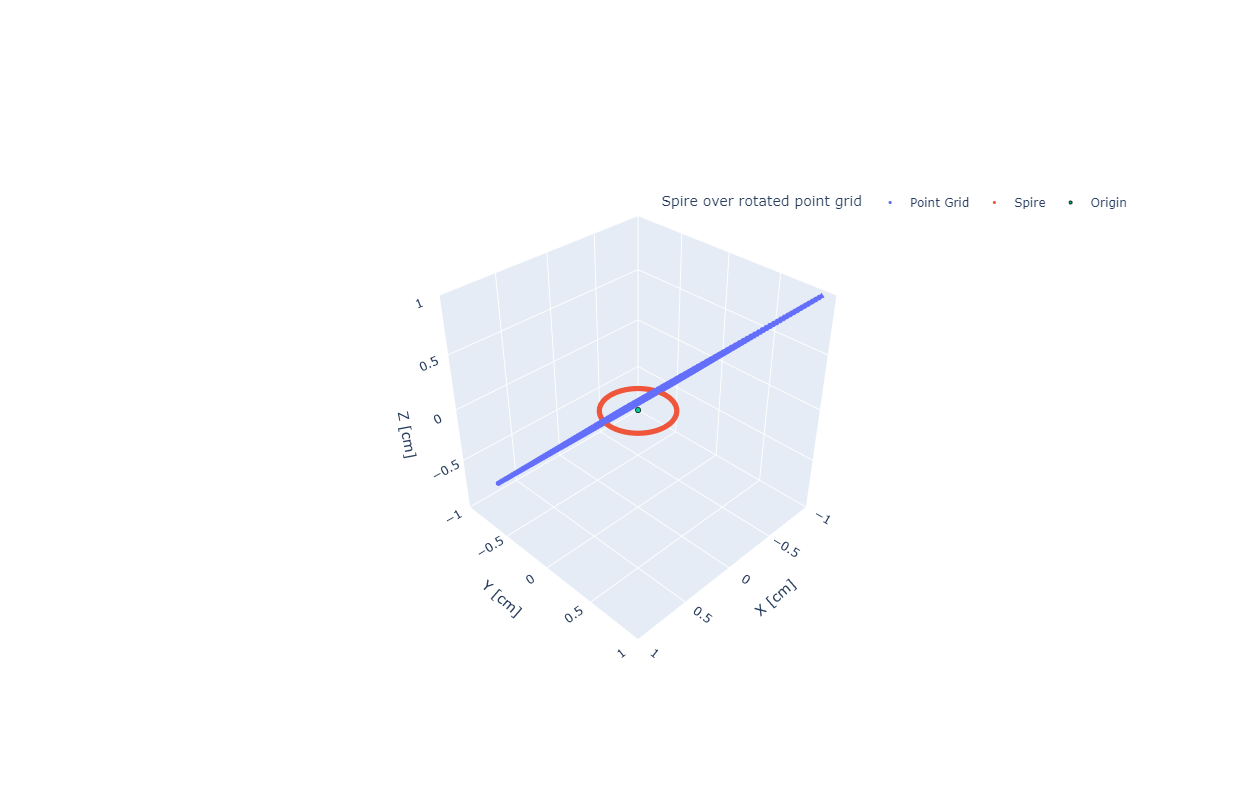

In [18]:
data=[go.Scatter3d(x=np.matrix.flatten(COORDmesh_OFFSET_ROT[0]), y=np.matrix.flatten(COORDmesh_OFFSET_ROT[1]), z=np.matrix.flatten(COORDmesh_OFFSET_ROT[2]),
                   mode='markers',
                   name="Point Grid",
                   opacity=1.0,
                   marker=dict(size=3,line=dict(width=0)), 
                  ),
      go.Scatter3d(x=SPI[0], y=SPI[1], z=SPI[2],mode='markers',name='Spire',
                  marker=dict(size=3,line=dict(width=0)),
                  ),
      go.Scatter3d(x=[0],y=[0],z=[0],mode='markers',name='Origin',
                  marker=dict(size=3,line=dict(color="black",width=1)),)
                  
      ]

layout = go.Layout(
    #title='Posiciones de medida del campo para el Magnetometro 2 representado con PlotLy',
    autosize=True,
    showlegend=True,
    legend_title="Spire over rotated point grid",

#    font=dict( family="Courier New, monospace", size=8, color="RebeccaPurple"),
    scene = dict(   xaxis_title='X [cm]',xaxis = dict(nticks=5, range=[-1,1]),
                    yaxis_title='Y [cm]',yaxis = dict(nticks=5, range=[-1,1]),
                    zaxis_title='Z [cm]',zaxis = dict(nticks=5, range=[-1,1])
                ),  
                margin=dict(t=40, r=0, l=20, b=20)
)
#How camera controls work
#The camera position and direction is determined by three vectors: up, center, eye. 
# Their coordinates refer to the 3-d domain, i.e., (0, 0, 0) is always the center of the domain, no matter data values.
# The eye vector determines the position of the camera. The default is $(x=1.25, y=1.25, z=1.25)$.
# The up vector determines the up direction on the page. The default is $(x=0, y=0, z=1)$, that is, the z-axis points up.
# The projection of the center point lies at the center of the view. By default it is $(x=0, y=0, z=0)$.
# 
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=2, y=2, z=2)
)
#Posición de la Leyenda
legend=dict(
    orientation="h",
    yanchor="top",   y=0.8,
    xanchor="right", x=0.9
)

fig = go.Figure(data,layout)
fig.update_layout(scene_camera=camera, width=800, height=800,legend=legend)
#Ratio de aspecto para que todos loso ejes se vean con el mismo tamaño
fig.update_layout(
        scene = dict(
            aspectmode='cube'
        ))
fig.show()

In [19]:
Bx_OFFSET_ROT=Bx_spire(I,a,COORDmesh_OFFSET_ROT[0],COORDmesh_OFFSET_ROT[1],COORDmesh_OFFSET_ROT[2])
By_OFFSET_ROT=By_spire(I,a,COORDmesh_OFFSET_ROT[0],COORDmesh_OFFSET_ROT[1],COORDmesh_OFFSET_ROT[2])
Bz_OFFSET_ROT=Bz_spire(I,a,COORDmesh_OFFSET_ROT[0],COORDmesh_OFFSET_ROT[1],COORDmesh_OFFSET_ROT[2])




Bmesh_ROT=np.array([Bx_OFFSET_ROT,By_OFFSET_ROT,Bz_OFFSET_ROT])


In [20]:
Bmesh=np.tensordot(r_matrix,np.array(Bmesh_ROT),axes=1)


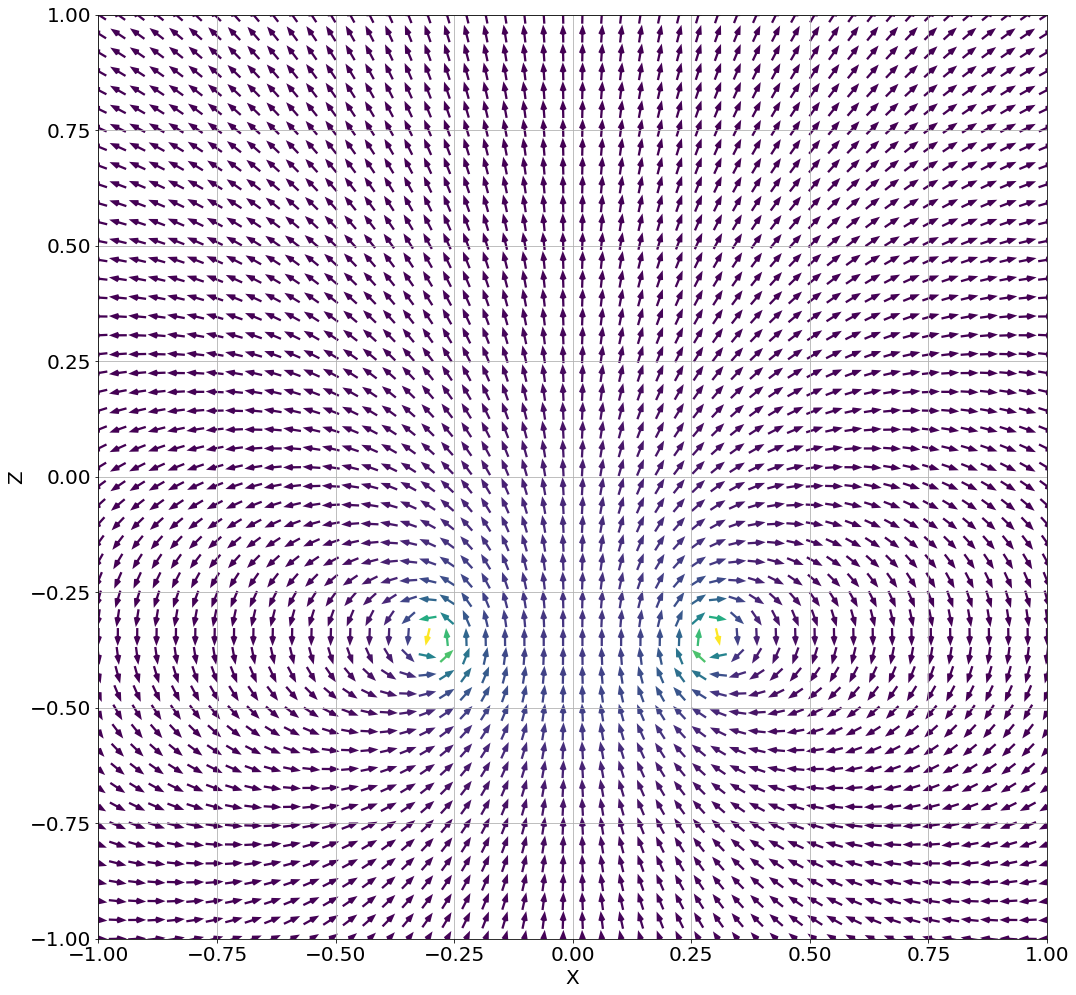

In [21]:
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(17)

M = np.hypot(Bmesh[0], Bmesh[2])

plt.quiver(Xmesh,Zmesh,Bmesh[0]/M,Bmesh[2]/M,M, scale=4, scale_units='inches',headwidth=3,headlength=4,pivot='middle')
plt.xticks(fontsize=20)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('X',fontsize=20)
plt.ylabel('Z',fontsize=20)
plt.yticks(fontsize=20)

plt.grid()

plt.show() 

# QUADRUPOLE 

In [35]:
def Quad_Spires(a,x_0,y_0,z_0,phi,theta):
    phi_ang=np.array(list(range(0,361)))
    phi_rad=phi_ang*2*math.pi/360
    X=a*np.cos(phi_rad)
    Y=a*np.sin(phi_rad)
    Z1=[a]*len(phi_rad)
    Z2=[-a]*len(phi_rad)
    
    SPI_1=[X,Y,Z1]
    SPI_2=[X,Y,Z2]
    r=R.from_euler('xz',[[theta,phi]], degrees=True)
    r_matrix=r.as_matrix()[0]
    SPI_1_ROT=np.tensordot(r_matrix,SPI_1,axes=1)
    SPI_2_ROT=np.tensordot(r_matrix,SPI_2,axes=1)
    SPI_1_ROT_OFFSET=SPI_1_ROT+np.array([np.array([x_0]*len(SPI_1_ROT[0])),np.array([y_0]*len(SPI_1_ROT[1])),np.array([z_0]*len(SPI_1_ROT[2]))])
    SPI_2_ROT_OFFSET=SPI_2_ROT+np.array([np.array([x_0]*len(SPI_2_ROT[0])),np.array([y_0]*len(SPI_2_ROT[1])),np.array([z_0]*len(SPI_2_ROT[2]))])
    return SPI_1_ROT_OFFSET,SPI_2_ROT_OFFSET

In [36]:
x_0=0.
y_0=0.
z_0=0
phi=0
theta=0
a=0.3
SPI_1_OFFSET_ROT,SPI_2_OFFSET_ROT=Quad_Spires(a,x_0,y_0,z_0,phi,theta)


In [37]:
import plotly.io as pio

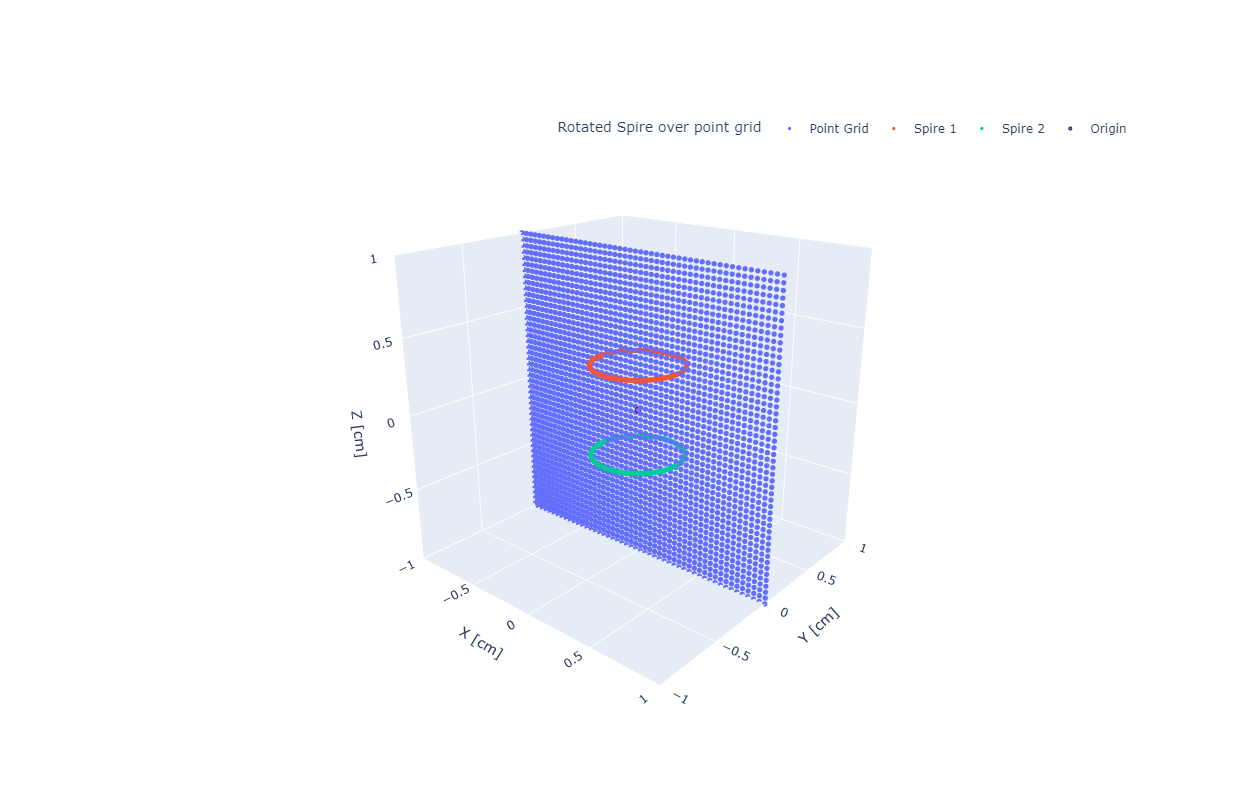

In [38]:
data=[go.Scatter3d(x=np.matrix.flatten(Xmesh), y=np.matrix.flatten(Ymesh), z=np.matrix.flatten(Zmesh),
                   mode='markers',
                   name="Point Grid",
                   opacity=1.0,
                   marker=dict(size=3,line=dict(width=0)), 
                  ),
      go.Scatter3d(x=SPI_1_OFFSET_ROT[0], y=SPI_1_OFFSET_ROT[1], z=SPI_1_OFFSET_ROT[2],mode='markers',name='Spire 1',
                  marker=dict(size=3,line=dict(width=0)),
                  ),
      go.Scatter3d(x=SPI_2_OFFSET_ROT[0], y=SPI_2_OFFSET_ROT[1], z=SPI_2_OFFSET_ROT[2],mode='markers',name='Spire 2',
                  marker=dict(size=3,line=dict(width=0)),
                  ),
      go.Scatter3d(x=[0],y=[0],z=[0],mode='markers',name='Origin',
                  marker=dict(size=3,line=dict(color="black",width=1)),),                 
      ]

layout = go.Layout(
    #title='Posiciones de medida del campo para el Magnetometro 2 representado con PlotLy',
    autosize=True,
    showlegend=True,
    legend_title="Rotated Spire over point grid",

#    font=dict( family="Courier New, monospace", size=8, color="RebeccaPurple"),
    scene = dict(   xaxis_title='X [cm]',xaxis = dict(nticks=5, range=[-1,1]),
                    yaxis_title='Y [cm]',yaxis = dict(nticks=5, range=[-1,1]),
                    zaxis_title='Z [cm]',zaxis = dict(nticks=5, range=[-1,1])
                ),  
                margin=dict(t=40, r=0, l=20, b=20)
)
#How camera controls work
#The camera position and direction is determined by three vectors: up, center, eye. 
# Their coordinates refer to the 3-d domain, i.e., (0, 0, 0) is always the center of the domain, no matter data values.
# The eye vector determines the position of the camera. The default is $(x=1.25, y=1.25, z=1.25)$.
# The up vector determines the up direction on the page. The default is $(x=0, y=0, z=1)$, that is, the z-axis points up.
# The projection of the center point lies at the center of the view. By default it is $(x=0, y=0, z=0)$.
# 
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.7, y=-2, z=1)
)
#Posición de la Leyenda
legend=dict(
    orientation="h",
    yanchor="top",   y=0.9,
    xanchor="right", x=0.9
)

fig = go.Figure(data,layout)
fig.update_layout(scene_camera=camera, width=800, height=800,legend=legend)
#Ratio de aspecto para que todos loso ejes se vean con el mismo tamaño
fig.update_layout(
        scene = dict(
            aspectmode='cube'
        ))
fig.show()

In [26]:
def B_quad(I,radius,X,Y,Z,x_0,y_0,z_0,phi,theta):
    r=R.from_euler('xz',[[theta,phi]], degrees=True)
    r_matrix=r.as_matrix()[0]
    r_matrix_inverse=np.linalg.inv(r_matrix)
    OFFSET_1=np.tensordot(r_matrix,np.array([0,0,radius]),axes=1)
    OFFSET_2=np.tensordot(r_matrix,np.array([0,0,-radius]),axes=1)
    
    OFFSET_1=OFFSET_1+[x_0,y_0,z_0]
    OFFSET_2=OFFSET_2+[x_0,y_0,z_0]

    
    
    X_1_OFFSET=X-np.array([np.array([OFFSET_1[0]]*len(X))]*len(X))
    Y_1_OFFSET=Y-np.array([np.array([OFFSET_1[1]]*len(Y))]*len(Y))
    Z_1_OFFSET=Z-np.array([np.array([OFFSET_1[2]]*len(Z))]*len(Z))
    
    X_2_OFFSET=X-np.array([np.array([OFFSET_2[0]]*len(X))]*len(X))
    Y_2_OFFSET=Y-np.array([np.array([OFFSET_2[1]]*len(Y))]*len(Y))
    Z_2_OFFSET=Z-np.array([np.array([OFFSET_2[2]]*len(Z))]*len(Z))
    
    COORD_1_OFFSET=[X_1_OFFSET,Y_1_OFFSET,Z_1_OFFSET]
    COORD_2_OFFSET=[X_2_OFFSET,Y_2_OFFSET,Z_2_OFFSET]
    
    COORD_1_OFFSET_ROT=np.tensordot(r_matrix_inverse,np.array(COORD_1_OFFSET),axes=1)
    COORD_2_OFFSET_ROT=np.tensordot(r_matrix_inverse,np.array(COORD_2_OFFSET),axes=1)
    
    Bx_1_ROT=Bx_spire(I,radius,COORD_1_OFFSET_ROT[0],COORD_1_OFFSET_ROT[1],COORD_1_OFFSET_ROT[2])
    By_1_ROT=By_spire(I,radius,COORD_1_OFFSET_ROT[0],COORD_1_OFFSET_ROT[1],COORD_1_OFFSET_ROT[2])
    Bz_1_ROT=Bz_spire(I,radius,COORD_1_OFFSET_ROT[0],COORD_1_OFFSET_ROT[1],COORD_1_OFFSET_ROT[2])
    
    Bx_2_ROT=Bx_spire(-I,radius,COORD_2_OFFSET_ROT[0],COORD_2_OFFSET_ROT[1],COORD_2_OFFSET_ROT[2])
    By_2_ROT=By_spire(-I,radius,COORD_2_OFFSET_ROT[0],COORD_2_OFFSET_ROT[1],COORD_2_OFFSET_ROT[2])
    Bz_2_ROT=Bz_spire(-I,radius,COORD_2_OFFSET_ROT[0],COORD_2_OFFSET_ROT[1],COORD_2_OFFSET_ROT[2])


    Bx_quad_ROT=Bx_1_ROT+Bx_2_ROT
    By_quad_ROT=By_1_ROT+By_2_ROT
    Bz_quad_ROT=Bz_1_ROT+Bz_2_ROT

    B_quad_ROT=np.array([Bx_quad_ROT,By_quad_ROT,Bz_quad_ROT])
    B_quad=np.tensordot(r_matrix,np.array(B_quad_ROT),axes=1)
    return B_quad,COORD_1_OFFSET_ROT,COORD_2_OFFSET_ROT
    

In [27]:
B_quad_test,COORD_1_OFFSET_ROT,COORD_2_OFFSET_ROT=B_quad(I,a,Xmesh,Ymesh,Zmesh,x_0,y_0,z_0,phi,theta)


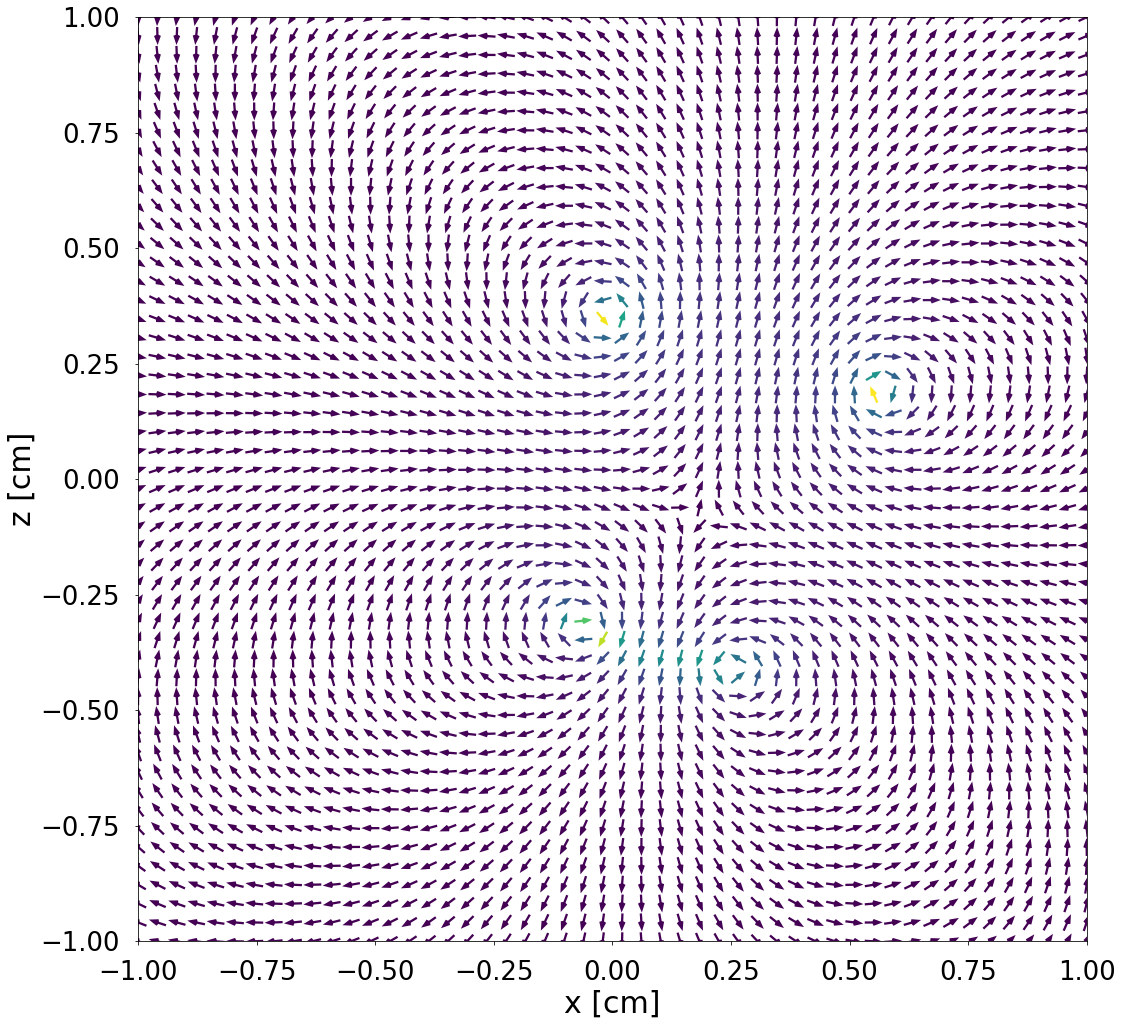

In [31]:
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(17)

M = np.hypot(B_quad_test[0], B_quad_test[2])

plt.quiver(Xmesh,Zmesh,B_quad_test[0]/M,B_quad_test[2]/M,M, scale=4, scale_units='inches',headwidth=3,headlength=4,pivot='middle',cmap='viridis')
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
#plt.colorbar()
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('x [cm]',fontsize=30)
plt.ylabel('z [cm]',fontsize=30)
plt.tick_params(axis='both', which='major', pad=15)
plt.grid()
plt.savefig('IMAGES/Figure_BQuad.png', format='png')

plt.grid()

plt.show()

In [2]:
%run -i CountLines.py Quadrupole.ipynb

CODE LINES
594
